# One Sample Hypothesis Test

A one-sample test determines whether or not a sample statistic is statistically different from a population value.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set_style("whitegrid")  

## One Sample Z test for Proportion

The one-sample proportion test estimates whether a sample's proportion significantly differs from the population proportion. It compares the sample proportion to a reference value or population proportion.

In [2]:
from statsmodels.stats import proportion as sprop

The One-Sample Proportion Test is used to estimate the proportion of a population. 

It compares the proportion to a reference value.

The hypothesis of the one-sample proportion test:
- `Null hypothesis`: population proportion is equal to the hypothesized proportion
- `Alternative hypotheses`: 
    - Population proportion is not equal to hypothesized proportion (two-tailed)
    - Population proportion is greater than the hypothesized proportion (one-tailed)
    - Population proportion is lesser than the hypothesized proportion (one-tailed)

In [3]:
def one_sample_prop(sample, population_prop=0, alpha=0.05, alternative='two-sided'):
    '''
    Hipothesis Test for one proportion
    sample:          list with 1 (success) and 0 (failure)
    population_prop: poblational proportion
    alpha:           significance level
    alternative:     one of the three values: 'two-sided', 'smaller', and 'larger'
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample z-test for proportion ---')
    print('    Ho: prop = ', np.round(np.round(population_prop,2)))
    print('    Ha: prop', sigHa[alternative], np.round(population_prop,2))
    print('Sample proportion = %.3f' %(np.mean(sample)))
    count = np.sum(sample)
    nobs=len(sample)
    z_stat, pval = sprop.proportions_ztest(count, nobs, value=population_prop, alternative=alternative)
    print('z-value = %.3f    p-value = %.4f' %(z_stat, pval))
    if pval < alpha:            
        print("%.4f <= %.2f We are rejecting the null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons to reject the null hypothesis." %(pval, alpha))

**Example 1**: In previous years, 60% of parents believed that social media was the leading cause of their teenager's lack of sleep. Do fewer parents today believe that their teenager's lack of sleep is caused due to social media? 

A survey of 100 parents with sons or daughters in a local high school was conducted.

Generating the data:
- `1`: parent believes social media is the reason for his teenager's lack of sleep, 
- `0`: parent does not believe social media is the reason for his teenager's lack of sleep

In [4]:
survey_parents = [1 if np.random.rand()<0.8 else 0 for i in range(100)]

In [5]:
np.sum(survey_parents)

75

We want to test the hypothesis prop < 0.6 (That is the alternative hypothesis.)

In [6]:
one_sample_prop(survey_parents, 0.6, alternative='smaller')

--- One sample z-test for proportion ---
    Ho: prop =  1.0
    Ha: prop <  0.6
Sample proportion = 0.750
z-value = 3.464    p-value = 0.9997
0.9997 > 0.05 We have no reasons to reject the null hypothesis.


We have no reasons to reject the null hypothesis (Ho), meaning the proportion of parents believing social media is the cause of lack of sleep in their sons is higher or equal to 60%.

Do more parents today believe that their teenager's lack of sleep is caused due to social media? (Alternative hypothesis)

In [7]:
one_sample_prop(survey_parents, 0.6, alternative='larger')

--- One sample z-test for proportion ---
    Ho: prop =  1.0
    Ha: prop >  0.6
Sample proportion = 0.750
z-value = 3.464    p-value = 0.0003
0.0003 <= 0.05 We are rejecting the null hypothesis.


We reject the null hypothesis, so the rate of parents believing social media is a bad influence on the sleep time of their sons is higher than 60% now.

Does the same number of parents today believe that their teenager's lack of sleep is caused due to social media?

In [8]:
one_sample_prop(survey_parents, 0.6, alternative='two-sided')

--- One sample z-test for proportion ---
    Ho: prop =  1.0
    Ha: prop != 0.6
Sample proportion = 0.750
z-value = 3.464    p-value = 0.0005
0.0005 <= 0.05 We are rejecting the null hypothesis.


As we can see, we are also rejecting the null hypothesis.

Remember, the hypothesis we want to test is usually the alternative because the null states that there is no significant difference between specified populations or any observed difference due to sampling or experimental error.
  
You do not need to specify `'two-sided'`, because it is the default parameter.

In [9]:
one_sample_prop(survey_parents, 0.6)

--- One sample z-test for proportion ---
    Ho: prop =  1.0
    Ha: prop != 0.6
Sample proportion = 0.750
z-value = 3.464    p-value = 0.0005
0.0005 <= 0.05 We are rejecting the null hypothesis.


**Example 2**: **student-mat.csv** dataset is related to student performance in math in two high schools in Portugal.  

In [10]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:

- **school**: student's school (***`binary`***: 'GP' or 'MS')
- **sex**: student's sex (***`binary`***: 'F' - female or 'M' - male)
- **age**: student's age (***`numeric`***: from 15 to 22)
- **Pstatus**: parent's cohabitation status (***`binary`***: 'T' - living together or 'A' - apart)
- **studytime**: weekly study time (***`numeric`***: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **schoolsup**: extra educational support (***`binary`***: yes or no)
- **internet**: Internet access at home (***`binary`***: yes or no)
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [11]:
data = data[['school','sex','age','Pstatus','studytime','schoolsup','internet','G1','G2','G3']]
print(data.shape)
data.head()

(395, 10)


,school,sex,age,Pstatus,studytime,schoolsup,internet,G1,G2,G3
0,GP,F,18,A,2,yes,no,5,6,6
1,GP,F,17,T,2,no,yes,5,5,6
2,GP,F,15,T,2,yes,yes,7,8,10
3,GP,F,15,T,3,no,yes,15,14,15
4,GP,F,16,T,2,no,no,6,10,10


We want to know if the internet use for students is superior to 80%.

Let's analyze the values of the variable `internet`.

In [12]:
data.internet.unique()

array(['no', 'yes'], dtype=object)

Let's create a new variable: `internet` with `1` if `yes`, and `0` if `no`.

In [13]:
internet = [1 if data.internet[k]=='yes' else 0 for k in range(data.shape[0])]

In [14]:
one_sample_prop(internet, 0.8, alternative='larger')

--- One sample z-test for proportion ---
    Ho: prop =  1.0
    Ha: prop >  0.8
Sample proportion = 0.833
z-value = 1.753    p-value = 0.0398
0.0398 <= 0.05 We are rejecting the null hypothesis.


We reject the null hypothesis; therefore, the proportion of students with the internet is greater than 80%.

Is it greater than 90%?

In [15]:
one_sample_prop(internet, 0.9, alternative='larger')

--- One sample z-test for proportion ---
    Ho: prop =  1.0
    Ha: prop >  0.9
Sample proportion = 0.833
z-value = -3.574    p-value = 0.9998
0.9998 > 0.05 We have no reasons to reject the null hypothesis.


We do not reject Ho; therefore, the proportion of students with internet is not greater than 90%.

## One Sample Z test for the Mean

One sample z-test determines whether a particular population parameter, mostly the mean, is significantly different from an assumed value. The test is valid when the sample comes from a normal distribution. It is a parametric test.

We would use a `z-test` if:
- Our sample size is greater than 30. Otherwise, use a t-test.
- Data points should be independent of each other
- Our data is normally distributed.
- Our data should be randomly selected from a population where each item has an equal chance of being selected.

In [16]:
def one_sample_ztest(sample, population_value, alpha=0.05, alternative='two-sided'):    
    '''
    z-test for one mean
    sample:      list of values
    pop_value:   poblational mean
    alpha:       significance level
    alternative: one of the three values: 'two-sided', 'smaller', and 'larger'    
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample z-test ---')
    print('    Ho: mean = ', np.round(population_value,2))
    print('    Ha: mean', sigHa[alternative], np.round(population_value,2))    
    print('Sample Mean = %.2f' %(np.mean(sample)))
    z_stat, pval = stests.ztest(x1=sample, value=population_value, alternative=alternative)
    print('z-value = %.3f    p-value = %.4f' %(z_stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting the null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons to reject the null hypothesis." %(pval, alpha))

**Example 3**: Let us generate fictitious students' heights and work with them.

In [17]:
# Generating data
np.random.seed(0)
h2 = np.random.normal(165,7,50)

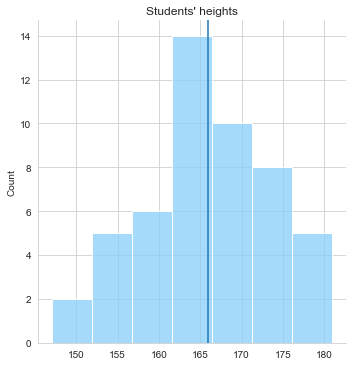

In [18]:
ax = sns.displot(x=h2, color='lightskyblue')
plt.axvline(x=np.mean(h2))
ax.set(title="Students' heights");

In [19]:
# Determining whether the students' heights h2 is 170 on average
one_sample_ztest(h2, 170, alternative='two-sided')

--- One sample z-test ---
    Ho: mean =  170
    Ha: mean != 170
Sample Mean = 165.98
z-value = -3.568    p-value = 0.0004
0.0004 <= 0.05 We are rejecting the null hypothesis.


The average student's height is not 170.

Let us determine whether h2 is lesser than 170.


In [20]:
one_sample_ztest(h2, 170, alternative='smaller')

--- One sample z-test ---
    Ho: mean =  170
    Ha: mean <  170
Sample Mean = 165.98
z-value = -3.568    p-value = 0.0002
0.0002 <= 0.05 We are rejecting the null hypothesis.


We reject the null hypothesis; therefore, the average student's height is lesser than 170.

**Example 4**: Let us determine whether the grade G1 on average is 11.

In [21]:
one_sample_ztest(data.G1, 11)

--- One sample z-test ---
    Ho: mean =  11
    Ha: mean != 11
Sample Mean = 10.91
z-value = -0.546    p-value = 0.5853
0.5853 > 0.05 We have no reasons to reject the null hypothesis.


There are no reasons for thinking it is not.

## One Sample t-test for the Mean

The one-sample t-test determines whether the sample mean is statistically different from a known or hypothesized population mean. The test is valid when the sample comes from a normal distribution. It is a parametric test.

We usually use the t-test when our sample size is less than 30, but that is not a hard rule.

**Example 5**: Suppose we have 20 student heights, and we are checking whether the average height is 170 cm or not.

In [22]:
# Generating data
np.random.seed(0)
h = np.random.normal(169,5,20)
h

array([177.82026173, 171.00078604, 173.89368992, 180.204466  ,
       178.33778995, 164.1136106 , 173.75044209, 168.24321396,
       168.48390574, 171.05299251, 169.72021786, 176.27136753,
       172.80518863, 169.60837508, 171.21931616, 170.66837164,
       176.47039537, 167.97420868, 170.56533851, 164.7295213 ])

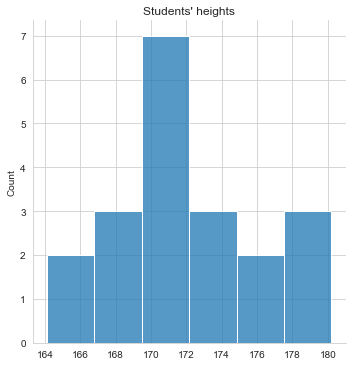

In [23]:
# Plotting the students' height distribution
ax = sns.displot(x=h)
ax.set(title="Students' heights");

We want to know whether the mean student's height is 170.

Let us use the traditional one-sample t-test with `st.ttest_1samp`.

In [24]:
def one_sample_ttest(sample, population_value, alpha=0.05, alternative='two-sided'):
    '''
    t-Test for one mean
    sample:      list of values
    pop_value:   poblational mean
    alpha:       significance level
    alternative: one of the three values: 'two-sided', 'smaller', and 'larger'
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample t-test ---')
    print('    Ho: mean = ', np.round(population_value,2))
    print('    Ha: mean', sigHa[alternative], np.round(population_value,2))    
    print('Sample Mean = %.2f' %(np.mean(sample)))
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    t_stat, pval = st.ttest_1samp(sample, population_value, alternative=alt[alternative])
    print('t-value = %.3f    p-value = %.4f' %(t_stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting the null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons to reject the null hypothesis." %(pval, alpha))

In [25]:
one_sample_ttest(h, 170)

--- One sample t-test ---
    Ho: mean =  170
    Ha: mean != 170
Sample Mean = 171.85
t-value = 1.894    p-value = 0.0736
0.0736 > 0.05 We have no reasons to reject the null hypothesis.


In [26]:
one_sample_ttest(h, 170, alternative='smaller')

--- One sample t-test ---
    Ho: mean =  170
    Ha: mean <  170
Sample Mean = 171.85
t-value = 1.894    p-value = 0.9632
0.9632 > 0.05 We have no reasons to reject the null hypothesis.


In [27]:
one_sample_ttest(h, 170, alternative='larger')

--- One sample t-test ---
    Ho: mean =  170
    Ha: mean >  170
Sample Mean = 171.85
t-value = 1.894    p-value = 0.0368
0.0368 <= 0.05 We are rejecting the null hypothesis.


We want to know whether the average student's height is 160 cm.

In [28]:
one_sample_ttest(h, 160)

--- One sample t-test ---
    Ho: mean =  160
    Ha: mean != 160
Sample Mean = 171.85
t-value = 12.148    p-value = 0.0000
0.0000 <= 0.05 We are rejecting the null hypothesis.


We reject the null hypothesis; therefore, `h` on average is not 160.

Let us create another function with a graphic representation of the hypothesis test.

Let's create another function, with a graphic representation of the hypothesis test.

In [29]:
def graph_one_sample_ttest(sample, population_value, alpha=0.05, alternative='two-sided'):
    '''
    Graph t-Test for one mean
    sample:      list of values
    pop_value:   poblational mean
    alpha:       significance level
    alternative: one of the three values: 'two-sided', 'smaller', and 'larger'
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample t-test ---')
    print('    Ha: mean = ', np.round(population_value,2))
    print('    Ha: mean', sigHa[alternative], np.round(population_value,2))    
    print('Sample Mean = %.2f' %(np.mean(sample)))
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    t_stat, pval = st.ttest_1samp(sample, population_value, alternative=alt[alternative])
    print('t-value = %.3f    p-value = %.4f' %(t_stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting the null hypothesis" %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons to reject the null hypothesis" %(pval, alpha))
    df = len(sample) - 1    
    if alternative=='two-sided':                    # plotting the graph with two critical regions
        cv1 = st.t.ppf(alpha/2,df)                  # left critical value 
        cv2 = st.t.ppf(1-alpha/2,df)                # right critical value 
        x1 = np.arange(-4, cv1, 0.01)
        plt.fill_between(x=x1, y1=st.t.pdf(x1,df), facecolor='red', alpha=0.6) 
        x2 = np.arange(cv1, cv2, 0.01)   
        plt.fill_between(x=x2, y1=st.t.pdf(x2,df), facecolor='lightskyblue', alpha=0.5) 
        x3 = np.arange(cv2, 4, 0.01)   
        plt.fill_between(x=x3, y1=st.t.pdf(x3,df), facecolor='red', alpha=0.6)  
        plt.plot(t_stat, 0.005, 'o', color='black') # plotting the statistic t_stat
    elif alternative=='smaller':                    # plotting the graph with left critical region
        cv1 = st.t.ppf(alpha,df)                    # left critical value
        x1 = np.arange(-4, cv1, 0.01)
        plt.fill_between(x=x1, y1=st.t.pdf(x1,df), facecolor='red', alpha=0.6)
        x2 = np.arange(cv1, 4, 0.01)   
        plt.fill_between(x=x2, y1=st.t.pdf(x2,df), facecolor='lightskyblue', alpha=0.5) 
        plt.plot(t_stat, 0.005, 'o', color='black') # plotting the statistic t_stat
    else:                                           # plotting the graph with right critical region
        cv1 = st.t.ppf(1-alpha,df)                  # right critical value
        x1 = np.arange(-4, cv1, 0.01)
        plt.fill_between(x=x1, y1=st.t.pdf(x1,df), facecolor='lightskyblue', alpha=0.5)
        x2 = np.arange(cv1, 4, 0.01)   
        plt.fill_between(x=x2, y1=st.t.pdf(x2,df), facecolor='red', alpha=0.6) 
        plt.plot(t_stat, 0.005, 'o', color='black') # plotting the statistic t_stat     

--- One sample t-test ---
    Ha: mean =  165
    Ha: mean != 165
Sample Mean = 165.98
t-value = 0.874    p-value = 0.3863
0.3863 > 0.05 We have no reasons to reject the null hypothesis


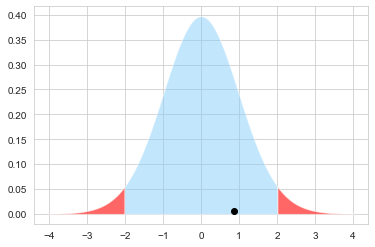

In [30]:
graph_one_sample_ttest(h2, 165)

--- One sample t-test ---
    Ha: mean =  165
    Ha: mean <  165
Sample Mean = 165.98
t-value = 0.874    p-value = 0.8069
0.8069 > 0.05 We have no reasons to reject the null hypothesis


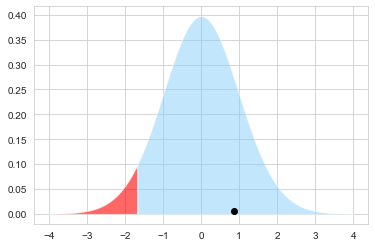

In [31]:
graph_one_sample_ttest(h2, 165, alternative='smaller')

--- One sample t-test ---
    Ha: mean =  165
    Ha: mean >  165
Sample Mean = 165.98
t-value = 0.874    p-value = 0.1931
0.1931 > 0.05 We have no reasons to reject the null hypothesis


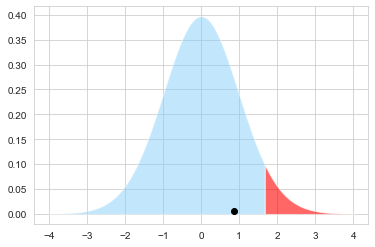

In [32]:
graph_one_sample_ttest(h2, 165, alternative='larger')

--- One sample t-test ---
    Ha: mean =  170
    Ha: mean >  170
Sample Mean = 165.98
t-value = -3.568    p-value = 0.9996
0.9996 > 0.05 We have no reasons to reject the null hypothesis


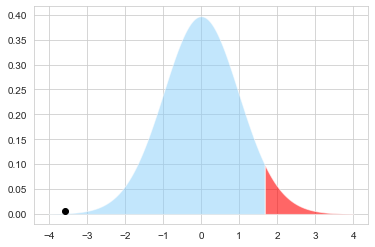

In [33]:
graph_one_sample_ttest(h2, 170, alternative='larger')

--- One sample t-test ---
    Ha: mean =  170
    Ha: mean <  170
Sample Mean = 165.98
t-value = -3.568    p-value = 0.0004
0.0004 <= 0.05 We are rejecting the null hypothesis


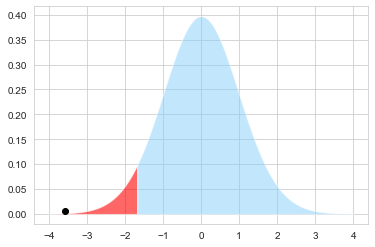

In [34]:
graph_one_sample_ttest(h2, 170, alternative='smaller')

--- One sample t-test ---
    Ha: mean =  170
    Ha: mean >  170
Sample Mean = 165.98
t-value = -3.568    p-value = 0.9996
0.9996 > 0.05 We have no reasons to reject the null hypothesis


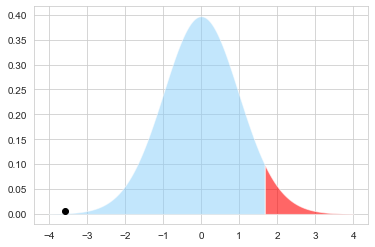

In [35]:
graph_one_sample_ttest(h2, 170, alternative='larger')

References:
- Dekking, F.M. et.al. (2005) A Modern Introduction to Probability and Statistics, USA: Springer
- Good, P. (2005) Permutation, Parametric, and Bootstrap Tests of Hypothesis, Third Edition, USA: Springer Series in Statistics